In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset, Dataset
from aif360.metrics import BinaryLabelDatasetMetric

rand_seed = 1234
np.random.seed(rand_seed)

In [ ]:
def reweighting(df_test):
    binaryLabelDataset = BinaryLabelDataset(
        favorable_label=1,
        unfavorable_label=0,
        df=df_test[var_list+['S','Y','W']], #df_test.drop('X',axis=1), #[x_list+['S','W','Y']],
        label_names=['Y'],
        instance_weights_name=['W'],
        protected_attribute_names=['S'],
        privileged_protected_attributes=[np.array([1.0])],unprivileged_protected_attributes=[np.array([0.])])
    RW = Reweighing(privileged_groups = [{'S': 1}],unprivileged_groups = [{'S': 0}]) #DisparateImpactRemover(repair_level = 1)
    RW.fit(binaryLabelDataset)
    weights_RW = RW.transform(binaryLabelDataset).instance_weights.reshape(-1)
    test_RW = df_test.copy()
    test_RW['W'] = weights_RW
    return test_RW

In [174]:
from aif360.algorithms.preprocessing import DisparateImpactRemover,Reweighing

In [131]:
from aif360.datasets import CompasDataset
label_map = {1.0: 'Did recid.', 0.0: 'No recid.'}
protected_attribute_maps = [{1.0: 'Male', 0.0: 'Female'}]
cd = CompasDataset(protected_attribute_names=['sex'],
                privileged_classes=[['Male']], metadata={'label_map': label_map,
                'protected_attribute_maps': protected_attribute_maps},
                features_to_drop=['age_cat', 'race','c_charge_degree', 'c_charge_desc'])

In [132]:
di=BinaryLabelDatasetMetric(cd,privileged_groups=[{'sex':1}],unprivileged_groups=[{'sex':0}])
di.disparate_impact()

1.2459083658494687

In [133]:
from aif360.datasets import CompasDataset
label_map = {1.0: 'Did recid.', 0.0: 'No recid.'}
protected_attribute_maps = {1.0: 'Caucasian', 0.0: 'Not Caucasian'} #[{1.0: 'Caucasian', 0.0: 'African-American'}] # 0.0: 'Not Caucasian'
privileged_groups = [{'race': 1}]
unprivileged_groups = [{'race': 0}]
cd = CompasDataset(protected_attribute_names=['race'],privileged_classes=[['Caucasian'],[1]], 
                    metadata={'label_map': label_map,'protected_attribute_maps': protected_attribute_maps},
                    features_to_drop=['age_cat', 'sex','c_charge_degree', 'c_charge_desc'])

In [134]:
di=BinaryLabelDatasetMetric(cd,privileged_groups=[{'race':1}],unprivileged_groups=[{'race':0}])
di.disparate_impact()

0.8400075282178671

In [152]:
test, train = cd.split([int(len(cd.instance_names)/3)]) #len(test.instance_names) = 2057

In [193]:
RW = Reweighing(privileged_groups = [{'race': 1}],unprivileged_groups = [{'race': 0}]) #DisparateImpactRemover(repair_level = 1)
RW.fit(train)
dataset_transf_train = RW.transform(train)
# di = DisparateImpactRemover(repair_level = 1)
# dataset_transf_train = di.fit_transform(train)
# transformed = dataset_transf_train.convert_to_dataframe()[0]

x=np.random.randint(0,len(train.instance_names)-5)
train.convert_to_dataframe()[0].iloc[x:x+5]

,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid
7033,22.0,0.0,0.0,0.0,0.0,2.0,0.0
7034,28.0,1.0,0.0,0.0,0.0,2.0,1.0
7036,28.0,0.0,0.0,0.0,0.0,0.0,1.0
7037,26.0,0.0,0.0,1.0,0.0,6.0,1.0
7039,36.0,1.0,0.0,0.0,0.0,3.0,1.0


In [192]:
dataset_transf_train

               instance weights features                                    \
                                         protected attribute                 
                                     age                race juv_fel_count   
instance names                                                               
3679                   1.175228     47.0                 1.0           0.0   
3681                   1.072773     52.0                 0.0           0.0   
3684                   0.928029     26.0                 0.0           0.0   
3687                   0.928029     45.0                 0.0           0.0   
3691                   0.928029     19.0                 0.0           0.0   
...                         ...      ...                 ...           ...   
10996                  1.072773     23.0                 0.0           0.0   
10997                  1.072773     23.0                 0.0           0.0   
10999                  1.072773     57.0                 0.0    

In [191]:
dataset_transf_train.convert_to_dataframe()[0].iloc[x:x+5]

,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid
7912,21.0,1.0,0.0,0.0,0.0,0.0,1.0
7913,30.0,0.0,0.0,0.0,0.0,4.0,0.0
7914,55.0,1.0,0.0,0.0,0.0,0.0,0.0
7915,25.0,0.0,0.0,0.0,0.0,0.0,0.0
7916,25.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from functions import*
import os
path=os.path.dirname(os.getcwd())
import matplotlib.pyplot as plt

In [194]:
K=200
e=0.01

var_list=['hoursperweek','age','capitalgain','capitalloss' ,'education-num'] #
var_dim=len(var_list)
pa='race'
pa_dict={'Male':1,'Female':0,'White':1,'Black':0}
pd.set_option('future.no_silent_downcasting', True)

messydata=pd.read_csv(path+'/data/adult_csv.csv',usecols=var_list+[pa,'class'])
messydata=messydata.rename(columns={pa:'S','class':'Y'})
messydata['S']=messydata['S'].replace(pa_dict)
messydata['Y']=messydata['Y'].replace({'>50K':1,'<=50K':0})
messydata=messydata[(messydata['S']==1)|(messydata['S']==0)]
for col in var_list+['S','Y']:
    messydata[col]=messydata[col].astype('category')
messydata['W']=1
X=messydata[var_list+['S','W']].to_numpy() # [X,S,W]
y=messydata['Y'].to_numpy() #[Y]

In [195]:
tv_dist=dict()
for x_name in var_list:
    x_range_single=list(pd.pivot_table(messydata,index=x_name,values=['W'])[('W')].index) 
    dist=rdata_analysis(messydata,x_range_single,x_name)
    tv_dist[x_name]=sum(abs(dist['x_0']-dist['x_1']))/2
x_list=[]
for key,val in tv_dist.items():
    if val>0.08:
        x_list+=[key]

C:\Users\zhouq\AppData\Local\Temp\ipykernel_15680\415012319.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  x_range_single=list(pd.pivot_table(messydata,index=x_name,values=['W'])[('W')].index)
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x000002DD92591D30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x000002DD92591D30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
clf=RandomForestClassifier(max_depth=5, random_state=0).fit(X_train[:,0:var_dim],y_train)

df_train=pd.DataFrame(np.concatenate((X_train,y_train.reshape(-1,1)), axis=1),columns=var_list+['S','W','Y'])
df_test=pd.DataFrame(np.concatenate((X_test,y_test.reshape(-1,1)), axis=1),columns=var_list+['S','W','Y'])
# df_test=df_test.groupby(by=var_list+['S','Y'],as_index=False).sum()

In [24]:
if len(x_list)>1:
    df_test['X']=[tuple(df_test[x_list].values[r]) for r in range(df_test.shape[0])]
    x_range=sorted(set(df_test['X']))
    weight=list(1/(df_test[x_list].max()-df_test[x_list].min())) # because 'education-num' range from 1 to 16 while others 1 to 4
    C=c_generate_higher(x_range,weight)
else:
    df_test['X']=df_test[x_list]
    x_range=sorted(set(df_test['X']))
    C=c_generate(x_range)

bin=len(x_range)
var_range=list(pd.pivot_table(df_test,index=var_list,values=['S','W','Y']).index)
dist=rdata_analysis(df_test,x_range,'X')
dist['t_x']=dist['x'] # #dist['x'] #dist['x_0']*0.5+dist['x_1']*0.5 
dist['v']=[(dist['x_0'][i]-dist['x_1'][i])/dist['x'][i] for i in range(bin)]
px=np.matrix(dist['x']).T
ptx=np.matrix(dist['t_x']).T
if np.any(dist['x_0']==0): 
    p0=np.matrix((dist['x_0']+1.0e-9)/sum(dist['x_0']+1.0e-9)).T
else:
    p0=np.matrix(dist['x_0']).T 
if np.any(dist['x_1']==0):
    p1=np.matrix((dist['x_1']+1.0e-9)/sum(dist['x_1']+1.0e-9)).T
else:
    p1=np.matrix(dist['x_1']).T 
V=np.matrix(dist['v']).T

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x000002DD92591D30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x000002DD92591D30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot0=pd.pivot_table(rdata[rdata['S']==0],index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:202: FutureWarning: The provided callable <function sum at 0x000002DD92591D30> is currently using DataFrameGroupBy.s

In [9]:
coupling_part2=partial_repair(C,e,px,ptx,V,1.0e-2,K)
coupling_part3=partial_repair(C,e,px,ptx,V,1.0e-3,K)

tv_part2=assess_tv(df_test,coupling_part2,x_range,x_list,var_list)
tv_part3=assess_tv(df_test,coupling_part3,x_range,x_list,var_list)

y_pred_part2=postprocess(df_test,coupling_part2,x_list,x_range,var_list,var_range,clf)
y_pred_part3=postprocess(df_test,coupling_part3,x_list,x_range,var_list,var_range,clf)

new_row_part2=pd.Series({'DI':DisparateImpact_postprocess(df_test,y_pred_part2),
                    'f1 macro':f1_score(df_test['Y'], y_pred_part2, average='macro',sample_weight=df_test['W']),
                    'f1 micro':f1_score(df_test['Y'], y_pred_part2, average='micro',sample_weight=df_test['W']),
                    'f1 weighted':f1_score(df_test['Y'], y_pred_part2, average='weighted',sample_weight=df_test['W']),
                    'TV distance':tv_part2,'method':'partial repair2'})
new_row_part3=pd.Series({'DI':DisparateImpact_postprocess(df_test,y_pred_part3),
                    'f1 macro':f1_score(df_test['Y'], y_pred_part3, average='macro',sample_weight=df_test['W']),
                    'f1 micro':f1_score(df_test['Y'], y_pred_part3, average='micro',sample_weight=df_test['W']),
                    'f1 weighted':f1_score(df_test['Y'], y_pred_part3, average='weighted',sample_weight=df_test['W']),
                    'TV distance':tv_part3,'method':'partial repair3'})

KeyboardInterrupt: 

In [25]:
from aif360.datasets import AdultDataset
protected = 'sex'
ad = AdultDataset(protected_attribute_names=[protected],
    privileged_classes=[['Male']], categorical_features=[],
    features_to_keep=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
test, train = ad.split([16281])

In [29]:
from sklearn.preprocessing import MinMaxScaler, Normalizer,StandardScaler
scaler = MinMaxScaler(copy=False)

In [28]:
from sklearn.preprocessing import 
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()

In [59]:
di = DisparateImpactRemover(repair_level = 1)
dataset_transf_train = di.fit_transform(cd)
transformed = dataset_transf_train.convert_to_dataframe()[0]

In [227]:
binaryLabelDataset = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_train[var_list+['S','Y']], #df_test.drop('X',axis=1), #[x_list+['S','W','Y']],
    label_names=['Y'],
    # instance_weights_name=['W'],
    protected_attribute_names=['S'],
    privileged_protected_attributes=[np.array([1.0])],unprivileged_protected_attributes=[np.array([0.])])
# binaryLabelDataset.features = scaler.fit_transform(binaryLabelDataset.features)
# transformer = StandardScaler().fit(binaryLabelDataset.features) 
# binaryLabelDataset.features = transformer.transform(binaryLabelDataset.features)
RW = Reweighing(privileged_groups = [{'S': 1}],unprivileged_groups = [{'S': 0}]) #DisparateImpactRemover(repair_level = 1)
RW.fit(binaryLabelDataset)
dataset_transf_train = RW.transform(binaryLabelDataset)
# di = DisparateImpactRemover(repair_level = 1)
# dataset_transf_train = di.fit_transform(binaryLabelDataset)
# transformed = dataset_transf_train.convert_to_dataframe()[0]

In [228]:
x=np.random.randint(0,len(binaryLabelDataset.instance_names)-5)
binaryLabelDataset.convert_to_dataframe()[0].iloc[x:x+5]

,hoursperweek,age,capitalgain,capitalloss,education-num,S,Y
8446,2.0,0.0,0.0,0.0,9.0,1.0,1.0
8447,2.0,2.0,0.0,0.0,9.0,1.0,0.0
8448,2.0,2.0,0.0,0.0,7.0,0.0,0.0
8449,2.0,3.0,0.0,0.0,9.0,0.0,0.0
8450,3.0,2.0,0.0,0.0,11.0,1.0,0.0


In [229]:
dataset_transf_train.convert_to_dataframe()[0].iloc[x:x+5]

,hoursperweek,age,capitalgain,capitalloss,education-num,S,Y
8446,2.0,0.0,0.0,0.0,9.0,1.0,1.0
8447,2.0,2.0,0.0,0.0,9.0,1.0,0.0
8448,2.0,2.0,0.0,0.0,7.0,0.0,0.0
8449,2.0,3.0,0.0,0.0,9.0,0.0,0.0
8450,3.0,2.0,0.0,0.0,11.0,1.0,0.0


In [230]:
binaryLabelDataset.instance_weights

array([1., 1., 1., ..., 1., 1., 1.])

In [231]:
dataset_transf_train.instance_weights

array([1.01790853, 1.01790853, 0.94708638, ..., 0.86553865, 0.94708638,
       1.01790853])

In [79]:
transformed['X']=[tuple(transformed[x_list].values[r]) for r in range(transformed.shape[0])]
dist_di=rdata_analysis(transformed[['X','S','W']],x_range,'X')

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x000002B0A682EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x000002B0A682EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot0=pd.pivot_table(rdata[rdata['S']==0],index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:202: FutureWarning: The provided callable <function sum at 0x000002B0A682EB80> is currently using DataFrameGroupBy.s

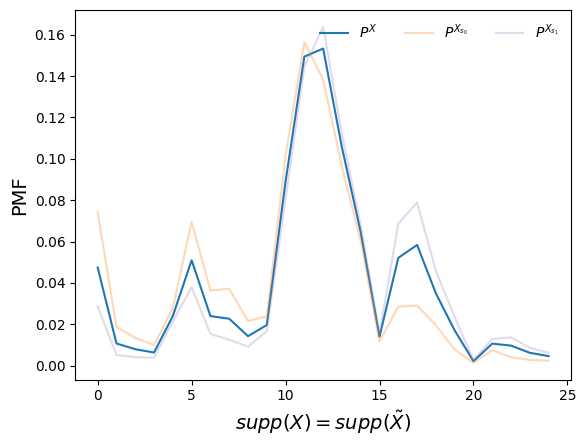

In [81]:
%matplotlib inline
# make the overview plot
plt.plot(np.arange(len(x_range)),dist_di['x'],label=r'$P^{X}$',color='tab:blue')
# plt.plot(x_range,dist['t_x'],label=r'$P^{\tilde{X}}$',color='tab:green')
plt.plot(np.arange(len(x_range)),dist_di['x_0'],label=r'$P^{X_{s_0}}$',alpha=0.3,color='tab:orange')
plt.plot(np.arange(len(x_range)),dist_di['x_1'],label=r'$P^{X_{s_1}}$',alpha=0.3,color='#9f86c0')
plt.ylabel('PMF',fontsize=14)
plt.xlabel(r'$supp(X)=supp(\tilde{X})$',fontsize=14)
plt.legend(ncol=3,frameon=False)
plt.show()

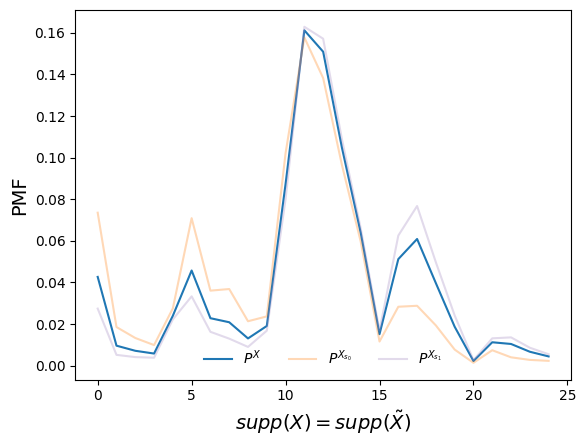

In [82]:
%matplotlib inline
# make the overview plot
plt.plot(np.arange(len(x_range)),dist['x'],label=r'$P^{X}$',color='tab:blue')
# plt.plot(x_range,dist['t_x'],label=r'$P^{\tilde{X}}$',color='tab:green')
plt.plot(np.arange(len(x_range)),dist['x_0'],label=r'$P^{X_{s_0}}$',alpha=0.3,color='tab:orange')
plt.plot(np.arange(len(x_range)),dist['x_1'],label=r'$P^{X_{s_1}}$',alpha=0.3,color='#9f86c0')
plt.ylabel('PMF',fontsize=14)
plt.xlabel(r'$supp(X)=supp(\tilde{X})$',fontsize=14)
plt.legend(ncol=3,frameon=False)
plt.show()

In [141]:
projected_aif360

,hoursperweek,age,S,Y,W,X
0,0.0,0.0,0.0,0.0,1.0,"(0.0, 0.0)"
1,0.0,0.0,0.0,0.0,2.0,"(0.0, 0.0)"
2,0.0,0.0,1.0,0.0,4.0,"(0.0, 0.0)"
3,0.0,0.0,0.0,0.0,3.0,"(0.0, 0.0)"
4,0.0,0.0,1.0,0.0,7.0,"(0.0, 0.0)"
...,...,...,...,...,...,...
2111,4.0,4.0,1.0,1.0,1.0,"(4.0, 4.0)"
2112,4.0,4.0,1.0,1.0,1.0,"(4.0, 4.0)"
2113,4.0,4.0,1.0,1.0,1.0,"(4.0, 4.0)"
2114,4.0,4.0,1.0,1.0,1.0,"(4.0, 4.0)"


In [98]:
assess_tv(projected_aif360,[],x_range,x_list,var_list)

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot0=pd.pivot_table(rdata[rdata['S']==0],index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:202: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.s

0.1974363436485967

In [99]:
assess_tv(df_test,[],x_range,x_list,var_list)

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot0=pd.pivot_table(rdata[rdata['S']==0],index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:202: FutureWarning: The provided callable <function sum at 0x000001EF69D4EB80> is currently using DataFrameGroupBy.s

0.1974363436485967

In [33]:
dict_aif360['instance_weights']
projected_aif360
y_pred=clf.predict(np.array(df_test[var_list]))

In [64]:
df_base=projection_higher(df_test,coupling_base,x_range,x_list,var_list)

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:257: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_t=pd.concat([df_t,sub],ignore_index=True) #pd.concat([df_t,samples_groupby(sub,x_list)], ignore_index=True)


In [74]:
df_base[['X','S','W']]

,X,S,W
0,"(0, 0)",0,2.000000e+00
1,"(0, 1)",0,2.027745e-09
2,"(0, 2)",0,1.999960e-09
3,"(0, 3)",0,1.999939e-09
4,"(0, 4)",0,1.999993e-09
...,...,...,...
52520,"(4, 0)",1,1.999905e-09
52521,"(4, 1)",1,2.000056e-09
52522,"(4, 2)",1,2.000057e-09
52523,"(4, 3)",1,2.027815e-09


In [72]:
pd.pivot_table(df_base[['X','W','S']],index='X',values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]

C:\Users\zhouq\AppData\Local\Temp\ipykernel_19744\572759499.py:1: FutureWarning: The provided callable <function sum at 0x0000016F58EDEB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_base[['X','W','S']],index='X',values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]


X
(0, 0)     803.999999
(0, 1)     193.000015
(0, 2)     156.000016
(0, 3)     111.000017
(0, 4)     461.000008
(1, 0)     869.999998
(1, 1)     452.000008
(1, 2)     367.000010
(1, 3)     256.000013
(1, 4)     362.000010
(2, 0)    1773.999975
(2, 1)    3336.999936
(2, 2)    2863.999948
(2, 3)    1986.999970
(2, 4)    1252.999988
(3, 0)     310.000012
(3, 1)    1022.999994
(3, 2)    1112.999992
(3, 3)     804.999999
(3, 4)     374.000010
(4, 0)      41.000019
(4, 1)     200.000015
(4, 2)     205.000014
(4, 3)     137.000016
(4, 4)      82.000017
Name: (sum, W), dtype: float64

In [50]:

coupling_base=baseline(C,e,px,ptx,V,K)

tv_base=assess_tv(df_test,coupling_base,x_range,x_list,var_list)

y_pred=clf.predict(np.array(df_test[var_list]))

c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:257: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_t=pd.concat([df_t,sub],ignore_index=True) #pd.concat([df_t,samples_groupby(sub,x_list)], ignore_index=True)
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:196: FutureWarning: The provided callable <function sum at 0x0000016F58EDEB80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot=pd.pivot_table(rdata,index=x_name,values=['W'],aggfunc=[np.sum],observed=False)[("sum",'W')]
c:\Users\zhouq\Documents\OT_Debiasing\E2\functions.py:199: FutureWarning: The provided callable <function sum at 0x0000016F58ED

In [59]:
len(y_pred)

2101